# Enhanced Deep Residual Networks for Single Image Super-Resolution (EDSR)

In [458]:
import os
import matplotlib.pyplot as plt

from model.edsr import edsr
from train import EdsrTrainer
import cv2
import imageio
import numpy as np
import sewar
import pandas as pd

%matplotlib inline

In [194]:
## Load Directory Paths

def load_path(path):
    directories = []
    if os.path.isdir(path):
        print('directory path: ', path)
        directories.append(path)
    for elem in os.listdir(path): #check for nested dir within parent dir
        if os.path.isdir(os.path.join(path,elem)):
            print('inside nested dir')
            directories = directories + load_path(os.path.join(path,elem))
            directories.append(os.path.join(path,elem))
    print('directories: ', directories)
    return directories

In [195]:
## Load Images from directory

def load_data_from_dirs(dirs, ext):
    files = []
    file_names = []
    count = 0
    res = {}
    
    for d in dirs:
        for f in os.listdir(d):
            if f.endswith(ext):
                image = cv2.imread(os.path.join(d,f))
                files.append(image)
                file_names.append(os.path.join(d,f))
                count = count + 1
                res[os.path.join(d,f)] = image
    
    print('list of files: ',len(files))
    print('list of files path: ', len(file_names), 'file path: ', file_names[0])
    print('Files Read: ',count)
    
    return files

In [196]:
## Load Images

def load_data(directory, ext):
    files = load_data_from_dirs(load_path(directory), ext)
    return files

In [197]:
## Load HR Normal Images from directory

hr_0_imgs = load_data('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/', '.png')

directory path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/
directories:  ['D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/']
list of files:  811
list of files path:  811 file path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/10273_idx5_x1001_y1901_class0.png
Files Read:  811


In [198]:
hr_0_imgs = hr_0_imgs[:300]

In [199]:
for img in hr_0_imgs:
    if img.shape != (50,50,3):
        print(img.shape)

(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)


In [200]:
new_hr_0_imgs = []
for img in hr_0_imgs:
    if img.shape != (50,50,3):
        continue
    else:
        new_hr_0_imgs.append(img)

In [201]:
len(new_hr_0_imgs)

283

In [202]:
## Load HR Diseased Images from directory

hr_1_imgs = load_data('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/', '.png')

directory path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/
directories:  ['D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/']
list of files:  1211
list of files path:  1211 file path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/10273_idx5_x1001_y1001_class1.png
Files Read:  1211


In [203]:
hr_1_imgs = hr_1_imgs[:300]

In [204]:
for img in hr_1_imgs:
    if img.shape != (50,50,3):
        print(img.shape)

In [205]:
new_hr_1_imgs = hr_1_imgs[:200]

In [206]:
# Number of residual blocks
depth = 16

# Super-resolution factor
scale = 4

In [207]:
# Location of model weights (needed for demo)
weights_dir = f'weights/edsr-16-x4'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

## Get Super Resolution for Normal Images

In [208]:
model = edsr(scale=scale, num_res_blocks=depth)
model.load_weights(weights_file)

In [209]:
from model import resolve_single
from utils import load_image, plot_sample

# def resolve_and_plot(lr_image_path):
#     lr = load_image(lr_image_path)
#     sr = resolve_single(model, lr)
#     plot_sample(lr, sr)

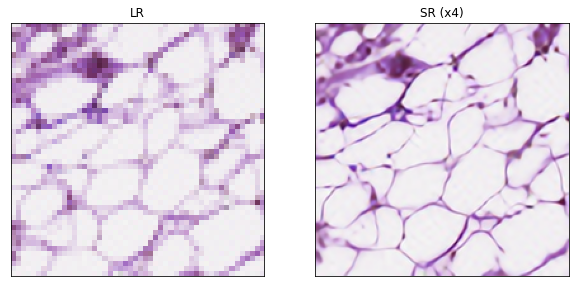

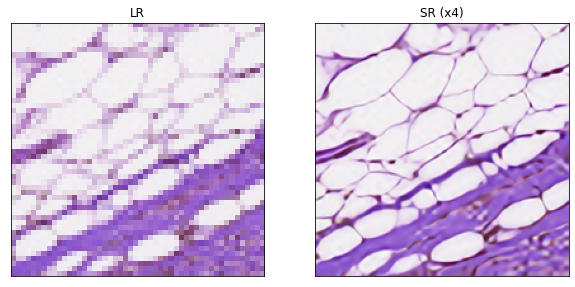

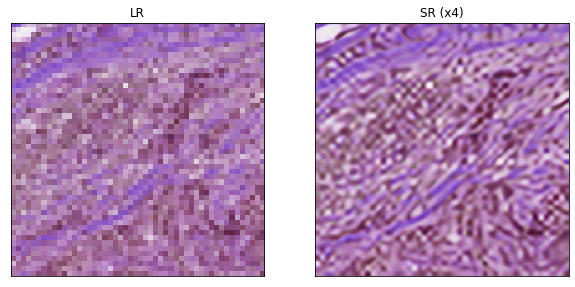

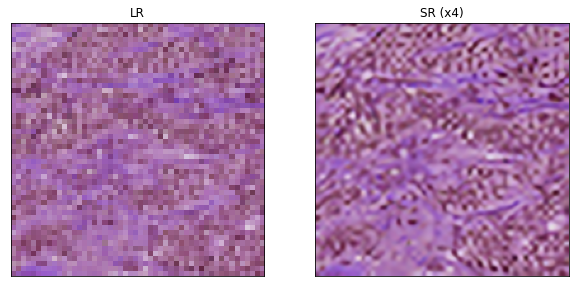

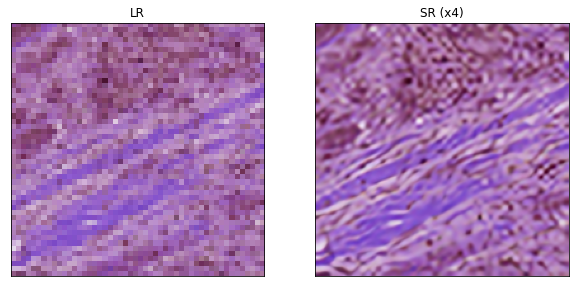

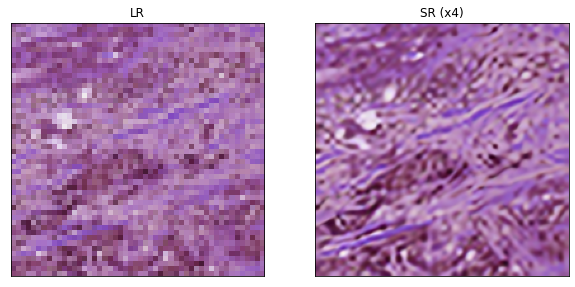

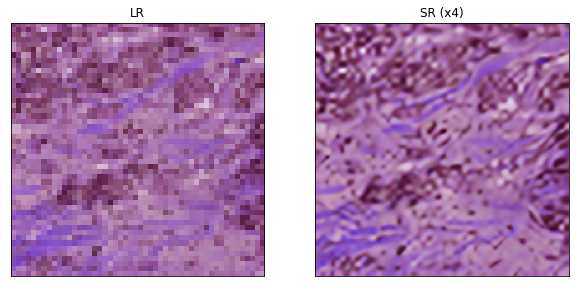

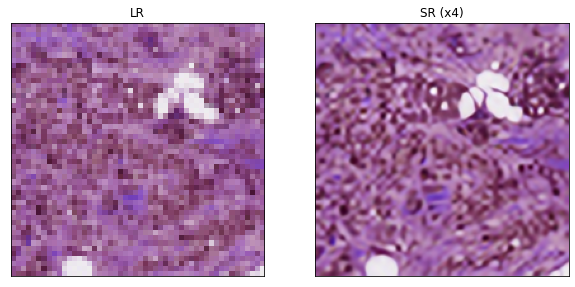

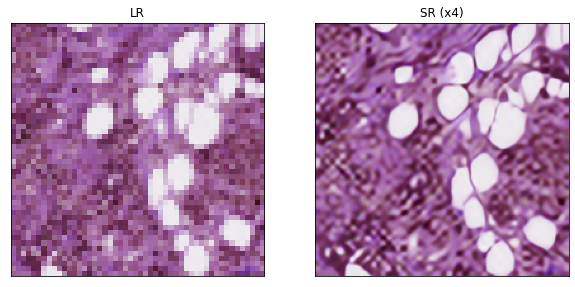

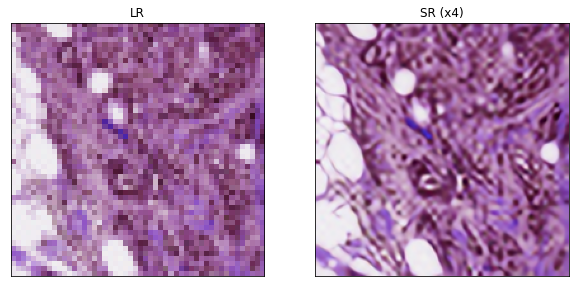

In [210]:
for img in new_hr_0_imgs[:10]:
    sr = resolve_single(model, img)
    plot_sample(img, sr)

In [211]:
sr_0_imgs = []
for img in new_hr_0_imgs[:200]:
    sr = resolve_single(model, img)
    sr_0_imgs.append(cv2.resize(np.asarray(sr), (50, 50),
               interpolation = cv2.INTER_CUBIC))

In [49]:
# for index, img in enumerate(new_hr_0_imgs):
#     sr = resolve_single(model, img)
#     imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/edsr_results/0/hr_imgs/HR_'+str(index+1)+'.png', np.asarray(img).astype(np.uint8))
#     imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/edsr_results/0/sr_imgs/SR_'+str(index+1)+'.png', np.asarray(sr).astype(np.uint8))

## Get Super Resolution for Diseased Images

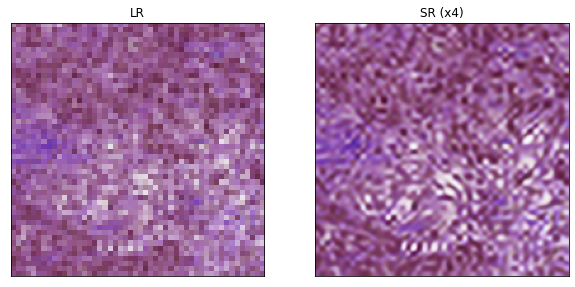

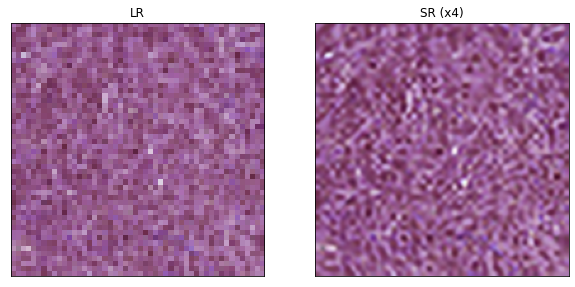

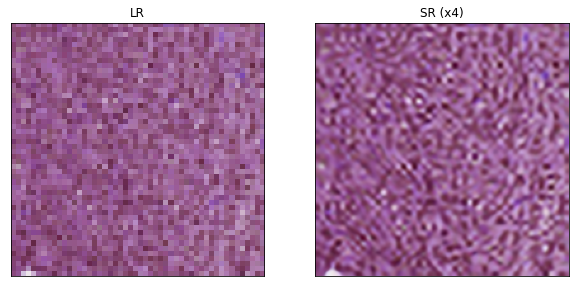

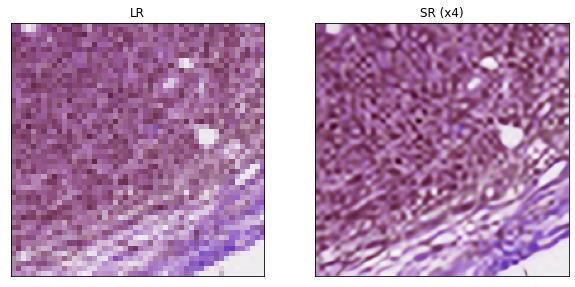

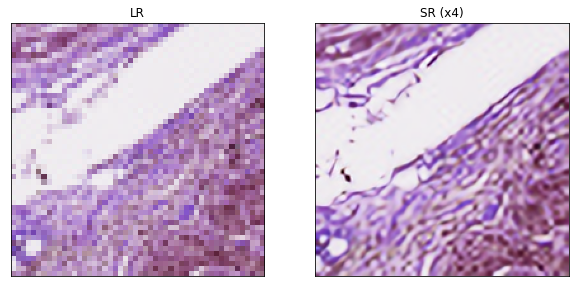

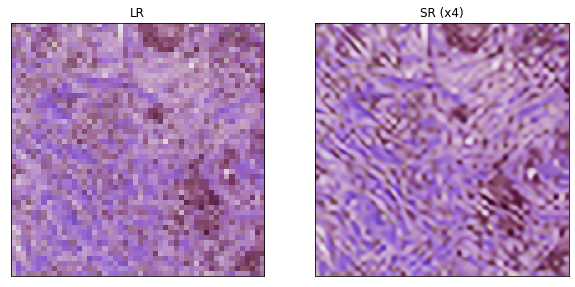

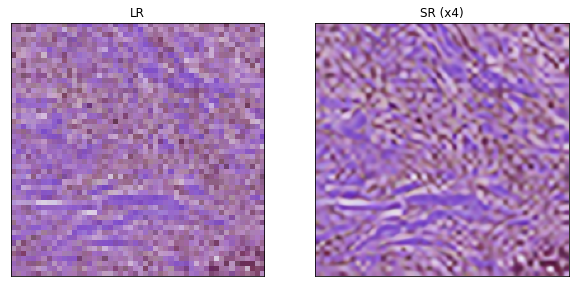

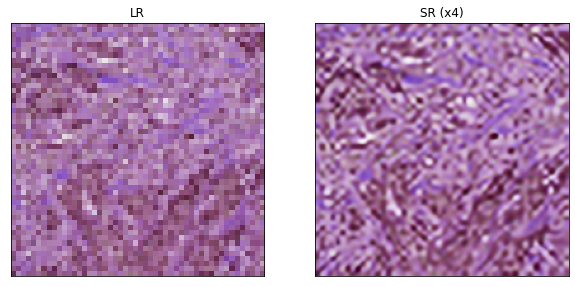

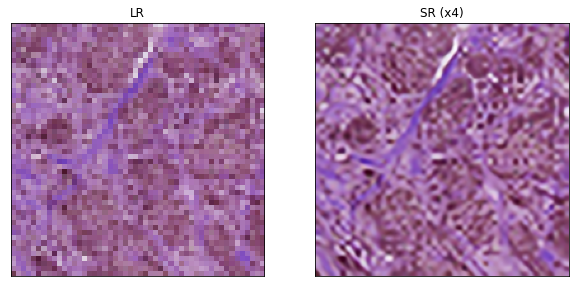

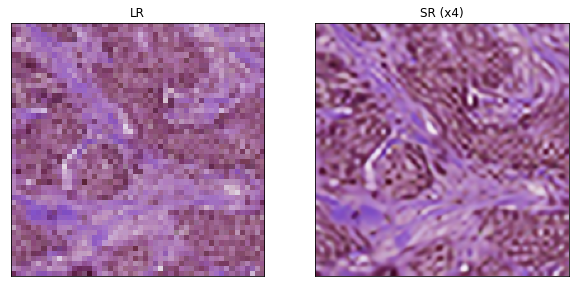

In [212]:
for img in hr_1_imgs[:10]:
    sr = resolve_single(model, img)
    plot_sample(img, sr)

In [287]:
sr_1_imgs = []
for img in new_hr_0_imgs[:200]:
    sr = resolve_single(model, img)
    sr_1_imgs.append(cv2.resize(np.asarray(sr), (50, 50),
               interpolation = cv2.INTER_CUBIC))

In [48]:
# for index, img in enumerate(hr_1_imgs):
#     sr = resolve_single(model, img)
#     imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/edsr_results/1/hr_imgs/HR_'+str(index+1)+'.png', np.asarray(img).astype(np.uint8))
#     imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/edsr_results/1/sr_imgs/SR_'+str(index+1)+'.png', np.asarray(sr).astype(np.uint8))

## Metric Calculations for Normal Images

### SSIM Calculation

In [291]:
sewar.full_ref.ssim(new_hr_0_imgs[12],sr_0_imgs[12])[0]

0.914744574482972

In [292]:
ssim_normal_arr = []
for i in range(200):
    ssim_normal_arr.append(sewar.full_ref.ssim(new_hr_0_imgs[i],sr_0_imgs[i])[0])
print(ssim_normal_arr[:10])

[0.8469049634852599, 0.8499409886311294, 0.8297723225993711, 0.8402126231613728, 0.8514394532687036, 0.8660024748414107, 0.8841246803843131, 0.885371164193324, 0.9111392968552928, 0.8925567451822639]


In [293]:
ssim_normal_mean, ssim_normal_std = np.mean(ssim_normal_arr), np.std(ssim_normal_arr)
print(ssim_normal_mean, ssim_normal_std)

0.8660615363958587 0.029846204192764656


### Mean Absolute Error

In [217]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [218]:
print(MAE(new_hr_0_imgs[11], sr_0_imgs[11]))

0.0008


In [219]:
mae_normal_arr = []
for i in range(200):
    mae_normal_arr.append(MAE(new_hr_0_imgs[i],sr_0_imgs[i]))
print(mae_normal_arr[:10])

[0.0038666666666666667, 0.006533333333333334, 0.0005333333333333334, 0.00013333333333333334, 0.0, 0.0002666666666666667, 0.0004, 0.0005333333333333334, 0.0002666666666666667, 0.0005333333333333334]


In [220]:
mae_normal_mean, mae_normal_std = np.mean(mae_normal_arr), np.std(mae_normal_arr)
print(mae_normal_mean, mae_normal_std)

0.0019313333333333335 0.0018941302313551023


### Mean Percentage Error

In [221]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [222]:
print(MPE(new_hr_0_imgs[11], sr_0_imgs[11]))

0.08


In [223]:
mpe_normal_arr = []
for i in range(200):
    mpe_normal_arr.append(MPE(new_hr_0_imgs[i],sr_0_imgs[i]))
print(mpe_normal_arr[:10])

[0.38666666666666666, 0.6533333333333333, 0.05333333333333334, 0.013333333333333334, 0.0, 0.02666666666666667, 0.04, 0.05333333333333334, 0.02666666666666667, 0.05333333333333334]


In [224]:
mpe_normal_mean, mpe_normal_std = np.mean(mpe_normal_arr), np.std(mpe_normal_arr)
print(mpe_normal_mean, mpe_normal_std)

0.19313333333333332 0.18941302313551023


### Mean Square Error

In [225]:
ans = sewar.full_ref.mse(new_hr_0_imgs[21],sr_0_imgs[21])
print(ans, type(ans))

273.8332 <class 'numpy.float64'>


In [226]:
mse_normal_arr = []
for i in range(200):
    mse_normal_arr.append(sewar.full_ref.mse(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images

print(mse_normal_arr[:10])

[262.26413333333335, 378.6718666666667, 343.0797333333333, 290.3965333333333, 238.52226666666667, 279.1462666666667, 203.32906666666668, 255.75026666666668, 320.0288, 333.98493333333334]


In [227]:
mse_normal_mean, mse_normal_std = np.mean(mse_normal_arr), np.std(mse_normal_arr)
print("mean: ", mse_normal_mean, " std: ", mse_normal_std)

mean:  279.94983666666667  std:  80.81710916355762


### Root Mean Square Error

In [228]:
ans = sewar.full_ref.rmse(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

18.52241165003449 <class 'numpy.float64'>


In [229]:
rmse_normal_arr = []
for i in range(200):
    rmse_normal_arr.append(sewar.full_ref.rmse(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images

print(rmse_normal_arr[:10])

[16.194571106804073, 19.459492970441616, 18.52241165003449, 17.041025008294934, 15.444166104606188, 16.707670892936175, 14.25935014882048, 15.99219392912263, 17.88934878635888, 18.27525467218811]


In [230]:
rmse_normal_mean, rmse_normal_std = np.mean(rmse_normal_arr), np.std(rmse_normal_arr)
print("mean: ", rmse_normal_mean, " std: ", rmse_normal_std)

mean:  16.525969021543233  std:  2.6157569775611966


### PSNR

In [231]:
ans = sewar.full_ref.psnr(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

22.776852970276078 <class 'numpy.float64'>


In [233]:
psnr_normal_arr = []
for i in range(200):
    psnr_normal_arr.append(sewar.full_ref.psnr(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images
print(psnr_normal_arr[:10])

[23.943414593758657, 22.34817320350425, 22.776852970276078, 23.50088933286102, 24.355514330931346, 23.67248536945506, 25.04880893736958, 24.05264265651644, 23.078912978034204, 22.893534854269546]


In [234]:
psnr_normal_mean, psnr_normal_std = np.mean(psnr_normal_arr), np.std(psnr_normal_arr)
print("mean: ", psnr_normal_mean, " std: ", psnr_normal_std)

mean:  23.895215335859998  std:  1.560021362161763


### Multi-Scale Structural Similarity Index (MS-SSIM)

In [235]:
ans = sewar.full_ref.msssim(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

(0.9808223025877031+0j) <class 'numpy.complex128'>


In [237]:
msssim_normal_arr = []
for i in range(200):
    msssim_normal_arr.append(sewar.full_ref.msssim(new_hr_0_imgs[i],sr_0_imgs[i]).real)
    
## Display Results for starting 10 images
print(msssim_normal_arr[:10])

[0.967631722421042, 0.966994394215103, 0.9808223025877031, 0.9790198698383673, 0.9808762681632528, 0.9859437479146701, 0.9845205657729658, 0.9835290056838403, 0.9891073311349505, 0.9870952448848195]


In [238]:
msssim_normal_mean, msssim_normal_std = np.mean(msssim_normal_arr), np.std(msssim_normal_arr)
print("mean: ", msssim_normal_mean,  " std: ", msssim_normal_std)

mean:  0.9790332741258241  std:  0.008977234155074346


### Spatial Corelation Coefficient (SCC)

In [243]:
ans = sewar.full_ref.scc(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

0.9450241181134845 <class 'numpy.float64'>


In [241]:
scc_normal_arr = []
for i in range(200):
    scc_normal_arr.append(sewar.full_ref.scc(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images

print(scc_normal_arr[:10])

[0.8712449059481655, 0.8763388666488512, 0.9450241181134845, 0.9533221433509638, 0.9435385169184137, 0.9490550704341894, 0.9459539134834014, 0.9494568525228395, 0.9325141124550886, 0.9360057043945669]


In [242]:
scc_normal_mean, scc_normal_std = np.mean(scc_normal_arr), np.std(scc_normal_arr)
print("mean: ", scc_normal_mean,  " std: ", scc_normal_std)

mean:  0.9152169419418769  std:  0.029850611382104642


### Pixel Based Visual Information Fidelity (vif-p)

In [245]:
ans = sewar.full_ref.vifp(new_hr_0_imgs[21],sr_0_imgs[21])
print(ans, type(ans))

0.4052725477824983 <class 'numpy.float64'>


In [247]:
vifp_normal_arr = []
for i in range(200):
    vifp_normal_arr.append(sewar.full_ref.vifp(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images
print(vifp_normal_arr[:10])

[0.321182235670837, 0.31968928836574295, 0.38578228678369203, 0.4309673802005422, 0.4024041851399936, 0.40956894076961303, 0.43609715699180795, 0.4068414105185371, 0.40614465750130296, 0.4013610808389007]


In [248]:
vifp_normal_mean, vifp_normal_std = np.mean(vifp_normal_arr), np.std(vifp_normal_arr)
print("mean: ", vifp_normal_mean,  " std: ", vifp_normal_std)

mean:  0.38371665898272694  std:  0.047851700176562706


## Visualizing Metrics for Normal Images

In [379]:
## Define error bar plot function

def error_barplot(error_arr,title='', file_name=''):
    
    # Calculate the average
    error_mean = np.mean(error_arr)
    
    # Calculate the standard deviation
    error_std = np.std(error_arr)

    # Define labels, positions, bar heights and error bar heights
    labels = ['For 200 Images']
    x_pos = np.arange(len(labels))
    CTEs = [error_mean]
    error = [error_std]
    
    # Build the plot
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
#     ax.set_ylabel('Mean Percentage Error')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title(title)
    ax.yaxis.grid(True)
    
    plt.savefig(f"./BHP  Images/visualizations/normal/error_barplot/{file_name}.png")

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()

### ErrorBar Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

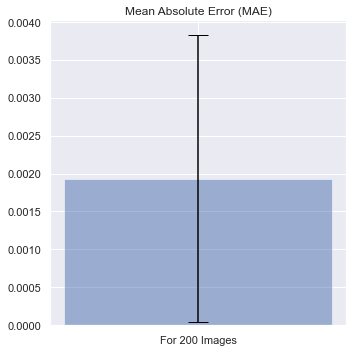

In [380]:
error_barplot(mae_normal_arr,title='Mean Absolute Error (MAE)', file_name='mae_barplot')

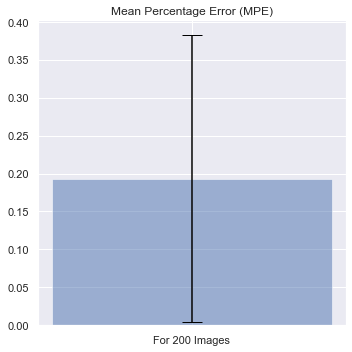

In [381]:
error_barplot(mpe_normal_arr,title='Mean Percentage Error (MPE)', file_name='mpe_barplot')

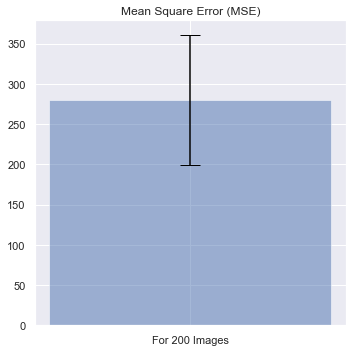

In [382]:
error_barplot(mse_normal_arr,title='Mean Square Error (MSE)', file_name='mse_barplot')

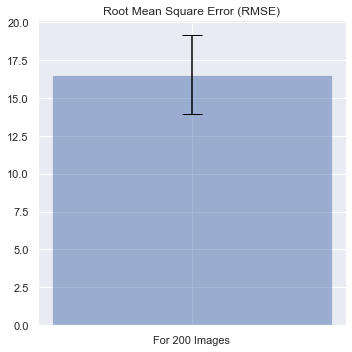

In [383]:
error_barplot(rmse_normal_arr,title='Root Mean Square Error (RMSE)', file_name='rmse_barplot')

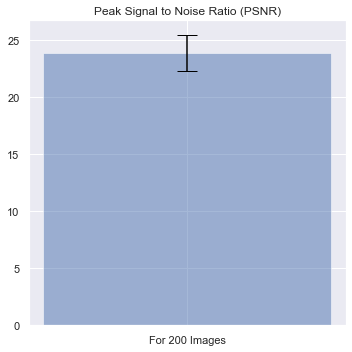

In [384]:
error_barplot(psnr_normal_arr,title='Peak Signal to Noise Ratio (PSNR)', file_name='psnr_barplot')

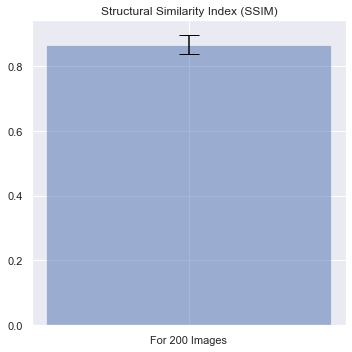

In [385]:
error_barplot(ssim_normal_arr,title='Structural Similarity Index (SSIM)', file_name='ssim_barplot')

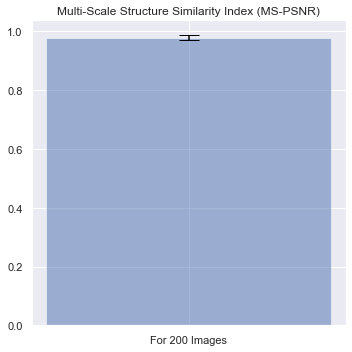

In [386]:
error_barplot(msssim_normal_arr,title='Multi-Scale Structure Similarity Index (MS-PSNR)',file_name='msssim_barplot')

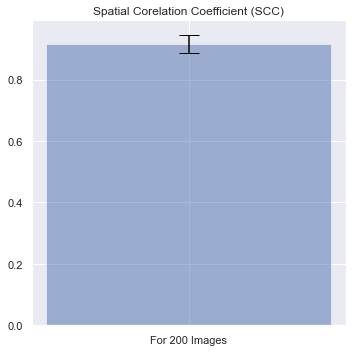

In [387]:
error_barplot(scc_normal_arr,title='Spatial Corelation Coefficient (SCC)', file_name='scc_barplot')

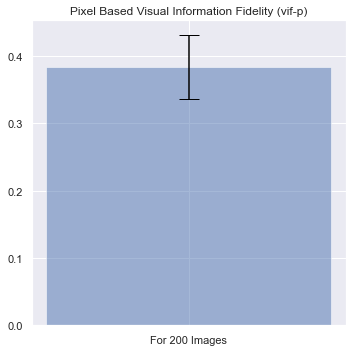

In [388]:
error_barplot(vifp_normal_arr,title='Pixel Based Visual Information Fidelity (vif-p)', file_name='vifp_barplot')

### Scatter Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

In [261]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,8)})

In [312]:
metric_dict = {'Images': [i for i in range(1,201)],
            'MAE' : mae_normal_arr,
            'MPE' : mpe_normal_arr,
            'MSE' : mse_normal_arr,
            'RMSE' : rmse_normal_arr,
            'PSNR' : psnr_normal_arr,
            'SSIM' : ssim_normal_arr,
            'MSSSIM' : msssim_normal_arr,
            'SCC' : scc_normal_arr,
            'VIFP' : vifp_normal_arr
         }
metric_df = pd.DataFrame(metric_dict)

In [358]:
def getScatterPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.scatterplot(x=metric_df.Images, y=y_val, data=df, linewidth=2.5).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/normal/scatter/{file_name}.png")

In [359]:
def RegPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.regplot(x=metric_df.Images, y=y_val, data=df).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/normal/regression/{file_name}.png")

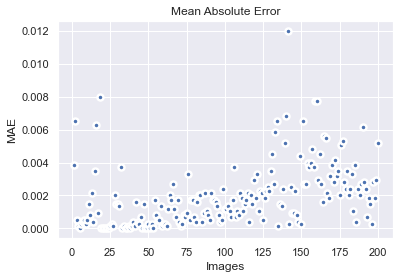

In [360]:
getScatterPlot(metric_df.MAE, metric_df, 'Mean Absolute Error', 'mae_scatter')

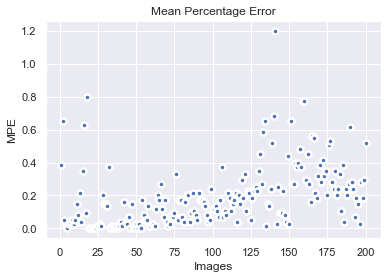

In [361]:
getScatterPlot(metric_df.MPE, metric_df, title='Mean Percentage Error', file_name='mpe_scatter')

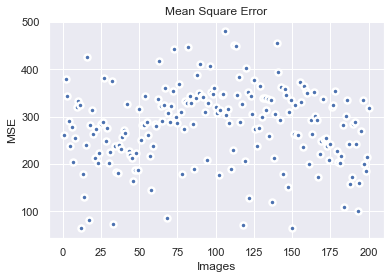

In [362]:
getScatterPlot(metric_df.MSE, metric_df, title='Mean Square Error', file_name='mse_scatter')

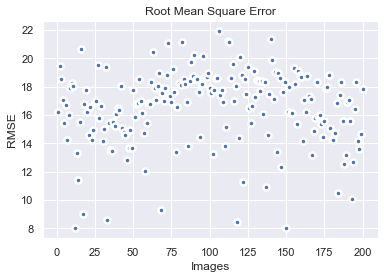

In [363]:
getScatterPlot(metric_df.RMSE, metric_df, title='Root Mean Square Error', file_name='rmse_scatter')

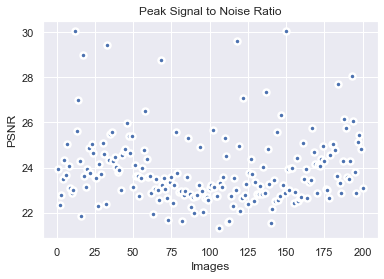

In [364]:
getScatterPlot(metric_df.PSNR, metric_df, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

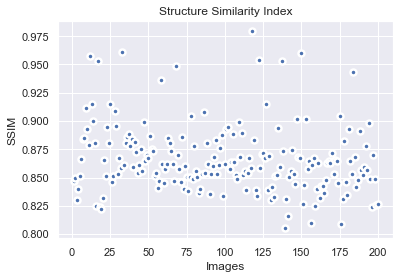

In [365]:
getScatterPlot(metric_df.SSIM, metric_df, title='Structure Similarity Index', file_name='ssim_scatter')

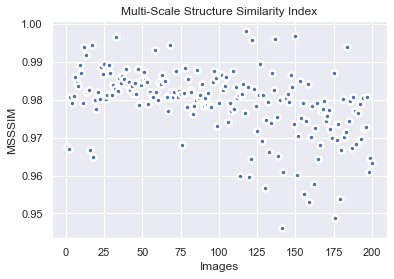

In [366]:
getScatterPlot(metric_df.MSSSIM, metric_df, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

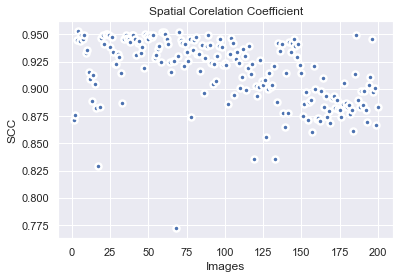

In [367]:
getScatterPlot(metric_df.SCC, metric_df, title='Spatial Corelation Coefficient', file_name='scc_scatter')

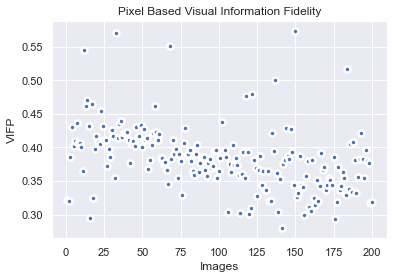

In [368]:
getScatterPlot(metric_df.VIFP, metric_df, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

### Regression Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

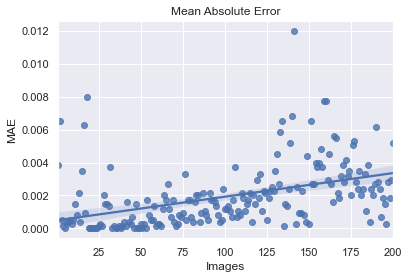

In [369]:
RegPlot(metric_df.MAE, metric_df, 'Mean Absolute Error', 'mae_scatter')

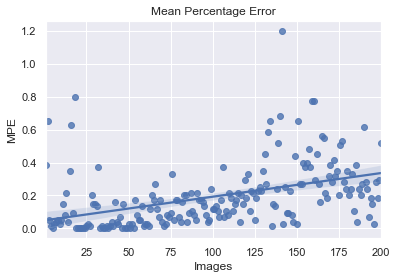

In [370]:
RegPlot(metric_df.MPE, metric_df, title='Mean Percentage Error', file_name='mpe_scatter')

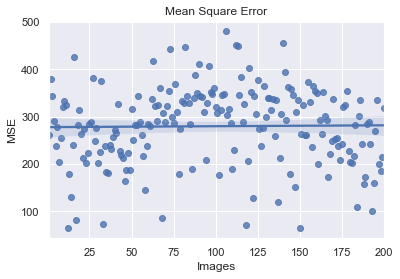

In [371]:
RegPlot(metric_df.MSE, metric_df, title='Mean Square Error', file_name='mse_scatter')

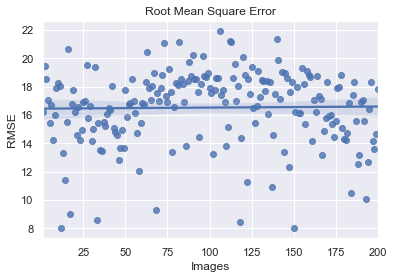

In [372]:
RegPlot(metric_df.RMSE, metric_df, title='Root Mean Square Error', file_name='rmse_scatter')

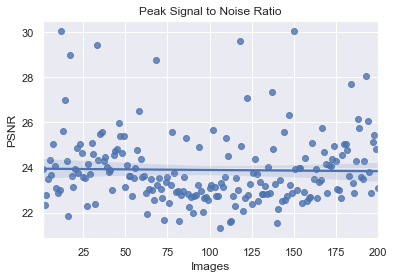

In [373]:
RegPlot(metric_df.PSNR, metric_df, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

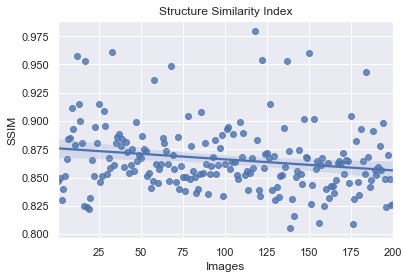

In [374]:
RegPlot(metric_df.SSIM, metric_df, title='Structure Similarity Index', file_name='ssim_scatter')

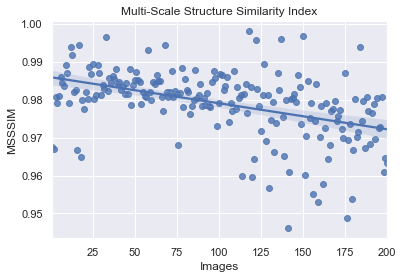

In [375]:
RegPlot(metric_df.MSSSIM, metric_df, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

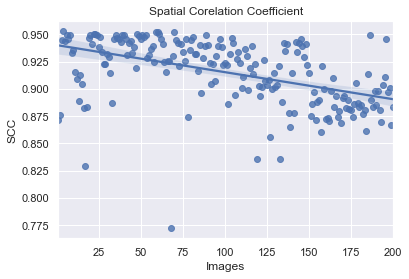

In [376]:
RegPlot(metric_df.SCC, metric_df, title='Spatial Corelation Coefficient', file_name='scc_scatter')

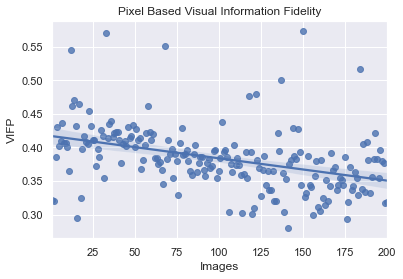

In [377]:
RegPlot(metric_df.VIFP, metric_df, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

## Metric Calculations for Diseased Images

### SSIM

In [288]:
sewar.full_ref.ssim(new_hr_1_imgs[12],sr_1_imgs[12])[0]

0.0552411703326988

In [290]:
ssim_cancer_arr = []
for i in range(200):
    ssim_cancer_arr.append(sewar.full_ref.ssim(new_hr_1_imgs[i],sr_1_imgs[i])[0])
print(ssim_cancer_arr[:10])

[0.02742841509406757, 0.01310629172164062, 0.013398582101160073, 0.061172065736031754, 0.036162443592810935, 0.01818977761591065, 0.012433677597569496, 0.01784320992510357, 0.018816007656564937, -0.03260939082427394]


In [294]:
ssim_cancer_mean, ssim_cancer_std = np.mean(ssim_cancer_arr), np.std(ssim_cancer_arr)
print(ssim_cancer_mean, ssim_cancer_std)

0.034779723732437054 0.02101578192908937


### Mean Absolute Error (MAE)

In [297]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [299]:
MAE(new_hr_1_imgs[12],sr_1_imgs[12])

0.0021333333333333334

In [392]:
mae_cancer_arr = []
for i in range(200):
    mae_cancer_arr.append(MAE(new_hr_1_imgs[i],sr_1_imgs[i]))
print(mae_cancer_arr[:10])

[0.0038666666666666667, 0.006533333333333334, 0.0005333333333333334, 0.00013333333333333334, 0.0, 0.0002666666666666667, 0.0004, 0.0005333333333333334, 0.0002666666666666667, 0.0005333333333333334]


In [396]:
mae_cancer_mean, mae_cancer_std = np.mean(mae_cancer_arr), np.std(mae_cancer_arr)
print(mae_cancer_mean, mae_cancer_std)

0.0019313333333333335 0.0018941302313551023


### Mean Percentage Error (MPE)

In [389]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [390]:
MPE(new_hr_1_imgs[12],sr_1_imgs[12])

0.21333333333333335

In [395]:
mpe_cancer_arr = []
for i in range(200):
    mpe_cancer_arr.append(MPE(new_hr_1_imgs[i],sr_1_imgs[i]))
print(mpe_cancer_arr[:10])

[0.38666666666666666, 0.6533333333333333, 0.05333333333333334, 0.013333333333333334, 0.0, 0.02666666666666667, 0.04, 0.05333333333333334, 0.02666666666666667, 0.05333333333333334]


In [397]:
mpe_cancer_mean, mpe_cancer_std = np.mean(mpe_cancer_arr), np.std(mpe_cancer_arr)
print(mpe_cancer_mean, mpe_cancer_std)

0.19313333333333332 0.18941302313551023


### Mean Square Error

In [419]:
ans = sewar.full_ref.mse(new_hr_1_imgs[21],sr_1_imgs[21])
print(ans, type(ans))

2070.6554666666666 <class 'numpy.float64'>


In [400]:
mse_cancer_arr = []
for i in range(200):
    mse_cancer_arr.append(sewar.full_ref.mse(new_hr_1_imgs[i],sr_1_imgs[i]))
print(mse_cancer_arr[:10])

[9673.8768, 9253.629733333333, 2543.654666666667, 2489.0358666666666, 5041.918933333333, 2408.8988, 1986.5289333333333, 2543.9368, 3749.209733333333, 4048.1956]


In [401]:
mse_cancer_mean, mse_cancer_std = np.mean(mse_cancer_arr), np.std(mse_cancer_arr)
print(mse_cancer_mean, mse_cancer_std)

5874.277961333333 2857.1320528517963


### Root Mean Square Error

In [417]:
ans = sewar.full_ref.rmse(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

50.43465739614642 <class 'numpy.float64'>


In [403]:
rmse_cancer_arr = []
for i in range(200):
    rmse_cancer_arr.append(sewar.full_ref.rmse(new_hr_1_imgs[i],sr_1_imgs[i]))
print(rmse_cancer_arr[:10])

[98.35586815233751, 96.19578854260374, 50.43465739614642, 49.89023819011758, 71.00647106661008, 49.08053381942784, 44.57049397677048, 50.43745433703013, 61.23079072928369, 63.625432022108896]


In [404]:
rmse_cancer_mean, rmse_cancer_std = np.mean(rmse_cancer_arr), np.std(rmse_cancer_arr)
print(rmse_cancer_mean, rmse_cancer_std)

74.21477092120202 19.14277248589767


### PSNR

In [416]:
ans = sewar.full_ref.psnr(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

14.076222108652834 <class 'numpy.float64'>


In [406]:
psnr_cancer_arr = []
for i in range(200):
    psnr_cancer_arr.append(sewar.full_ref.psnr(new_hr_1_imgs[i],sr_1_imgs[i]))
print(psnr_cancer_arr[:10])

[8.274798086631968, 8.467682428368692, 14.076222108652834, 14.170492060900974, 11.104845022900845, 14.312618055871917, 15.149854660320274, 14.075740431023032, 12.391406250391622, 12.058188723651263]


In [407]:
psnr_cancer_mean, psnr_cancer_std = np.mean(psnr_cancer_arr), np.std(psnr_cancer_arr)
print(psnr_cancer_mean, psnr_cancer_std)

11.027358522120489 2.343566808503134


### Multi-Scale Structure Similarity Index MS-SSIM

In [408]:
ans = sewar.full_ref.msssim(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

(0.9808223025877031+0j) <class 'numpy.complex128'>


In [411]:
msssim_cancer_arr = []
for i in range(200):
    msssim_cancer_arr.append(sewar.full_ref.msssim(new_hr_1_imgs[i],sr_1_imgs[i]).real)
print(msssim_cancer_arr[:10])

[0.33079662535306, 0.22320180111412388, 0.3201435528580909, 0.4166300138636093, 0.20658167872837288, 0.3025468733562369, 0.32426272018432306, 0.2503622883130205, 0.0791194702322108, 0.0656122911094275]


In [412]:
msssim_cancer_mean, msssim_cancer_std = np.mean(msssim_cancer_arr), np.std(msssim_cancer_arr)
print(msssim_cancer_mean, msssim_cancer_std)

0.23574328802740824 0.10803449541611121


### Spatial Corelation Coefficient (SCC)

In [415]:
ans = sewar.full_ref.scc(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

-0.033467416764756876 <class 'numpy.float64'>


In [414]:
scc_cancer_arr = []
for i in range(200):
    scc_cancer_arr.append(sewar.full_ref.scc(new_hr_1_imgs[i],sr_1_imgs[i]))
print(scc_cancer_arr[:10])

[-0.022511795077040302, -0.0322183475442471, -0.033467416764756876, 0.03284190658548755, 0.014469052782768832, -0.017525303170473936, -0.005884867345210845, -0.006453194395565364, -0.010710268190733169, 0.012441290425113686]


In [420]:
scc_cancer_mean, scc_cancer_std = np.mean(scc_cancer_arr), np.std(scc_cancer_arr)
print(scc_cancer_mean, scc_cancer_std)

0.0026045640249385293 0.019775951896312323


### Pixel Based Visual Information Fidelity (vif-p)

In [421]:
ans = sewar.full_ref.vifp(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

0.001152568104884577 <class 'numpy.float64'>


In [422]:
vifp_cancer_arr = []
for i in range(200):
    vifp_cancer_arr.append(sewar.full_ref.vifp(new_hr_1_imgs[i],sr_1_imgs[i]))
print(vifp_cancer_arr[:10])

[0.003925950738407169, 0.0007158640512027843, 0.001152568104884577, 0.0029880399366146947, 0.0029196528078711467, 0.002160670659130175, 0.0029249882457983213, 0.0030837874553677883, 0.0009065403235912977, 0.002200778139309387]


In [423]:
vifp_cancer_mean, vifp_cancer_std = np.mean(vifp_cancer_arr), np.std(vifp_cancer_arr)
print(vifp_cancer_mean, vifp_cancer_std)

0.002698026453179446 0.001818644040087465


### Visualizing Error Barplots for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [424]:
## Define error bar plot function

def error_barplot(error_arr,title='', file_name=''):
    
    # Calculate the average
    error_mean = np.mean(error_arr)
    
    # Calculate the standard deviation
    error_std = np.std(error_arr)

    # Define labels, positions, bar heights and error bar heights
    labels = ['For 200 Images']
    x_pos = np.arange(len(labels))
    CTEs = [error_mean]
    error = [error_std]
    
    # Build the plot
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
#     ax.set_ylabel('Mean Percentage Error')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title(title)
    ax.yaxis.grid(True)
    
    plt.savefig(f"./BHP  Images/visualizations/diseased/error_barplot/{file_name}.png")

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()

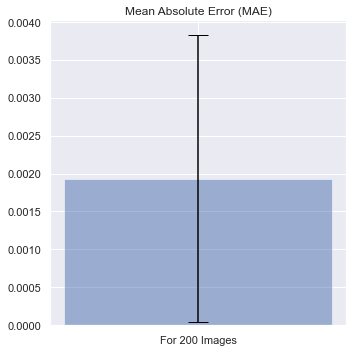

In [428]:
error_barplot(mae_cancer_arr,title='Mean Absolute Error (MAE)', file_name='mae_barplot')

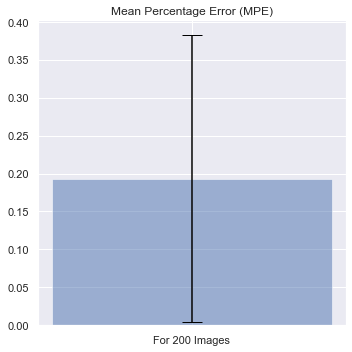

In [429]:
error_barplot(mpe_cancer_arr,title='Mean Percentage Error (MPE)', file_name='mpe_barplot')

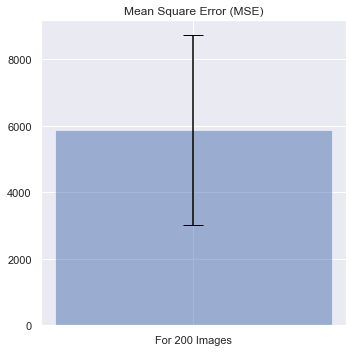

In [430]:
error_barplot(mse_cancer_arr,title='Mean Square Error (MSE)', file_name='mse_barplot')

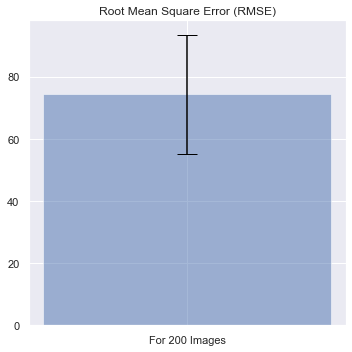

In [431]:
error_barplot(rmse_cancer_arr,title='Root Mean Square Error (RMSE)', file_name='rmse_barplot')

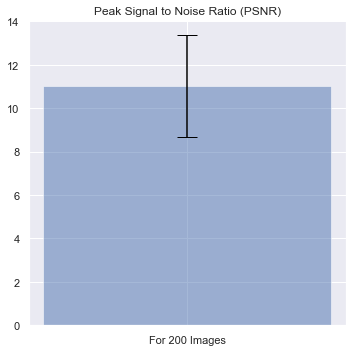

In [432]:
error_barplot(psnr_cancer_arr,title='Peak Signal to Noise Ratio (PSNR)', file_name='psnr_barplot')

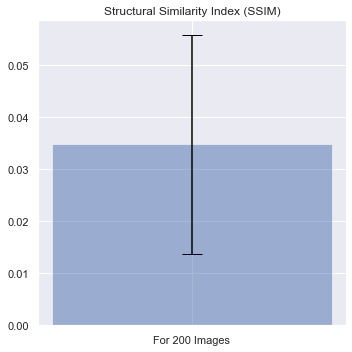

In [433]:
error_barplot(ssim_cancer_arr,title='Structural Similarity Index (SSIM)', file_name='ssim_barplot')

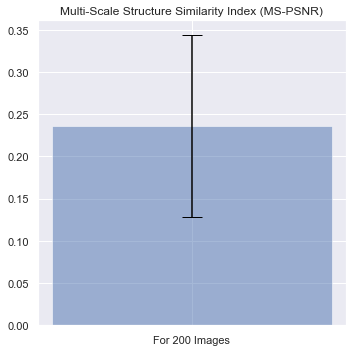

In [434]:
error_barplot(msssim_cancer_arr,title='Multi-Scale Structure Similarity Index (MS-PSNR)',file_name='msssim_barplot')

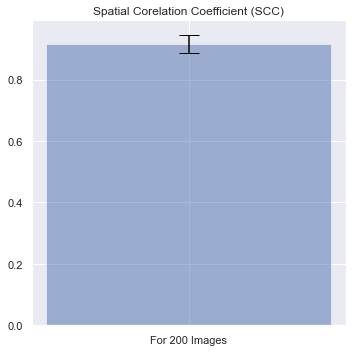

In [435]:
error_barplot(scc_normal_arr,title='Spatial Corelation Coefficient (SCC)', file_name='scc_barplot')

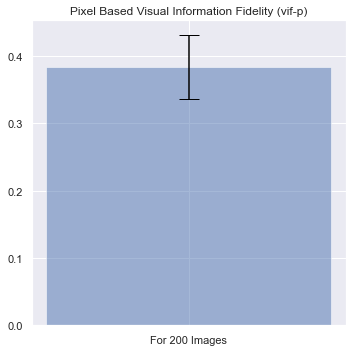

In [436]:
error_barplot(vifp_normal_arr,title='Pixel Based Visual Information Fidelity (vif-p)', file_name='vifp_barplot')

### Scatter Plot for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [437]:
metric_dict_cancer = {'Images': [i for i in range(1,201)],
            'MAE' : mae_cancer_arr,
            'MPE' : mpe_cancer_arr,
            'MSE' : mse_cancer_arr,
            'RMSE' : rmse_cancer_arr,
            'PSNR' : psnr_cancer_arr,
            'SSIM' : ssim_cancer_arr,
            'MSSSIM' : msssim_cancer_arr,
            'SCC' : scc_cancer_arr,
            'VIFP' : vifp_cancer_arr
         }
metric_df_cancer = pd.DataFrame(metric_dict_cancer)

In [438]:
def getScatterPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.scatterplot(x=metric_df.Images, y=y_val, data=df, linewidth=2.5).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/diseased/scatter/{file_name}.png")

In [439]:
def RegPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.regplot(x=metric_df.Images, y=y_val, data=df).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/diseased/regression/{file_name}.png")

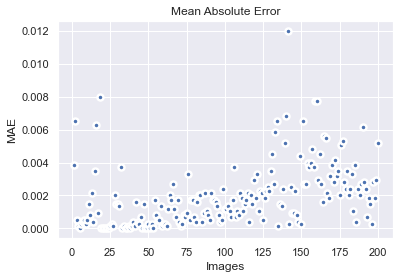

In [440]:
getScatterPlot(metric_df_cancer.MAE, metric_df_cancer, 'Mean Absolute Error', 'mae_scatter')

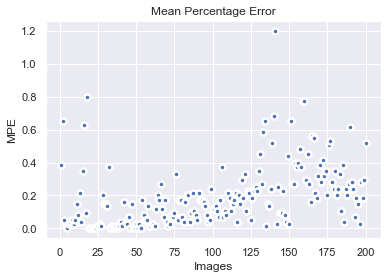

In [441]:
getScatterPlot(metric_df_cancer.MPE, metric_df_cancer, title='Mean Percentage Error', file_name='mpe_scatter')

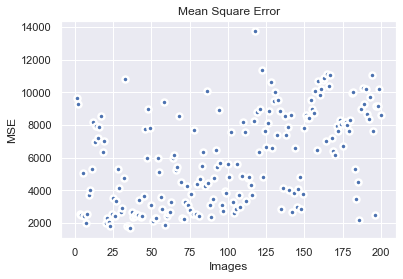

In [442]:
getScatterPlot(metric_df_cancer.MSE, metric_df_cancer, title='Mean Square Error', file_name='mse_scatter')

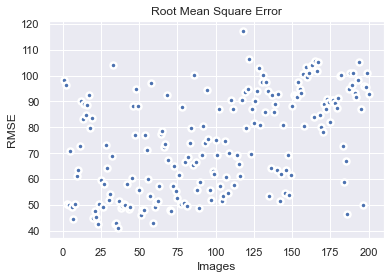

In [443]:
getScatterPlot(metric_df_cancer.RMSE, metric_df_cancer, title='Root Mean Square Error', file_name='rmse_scatter')

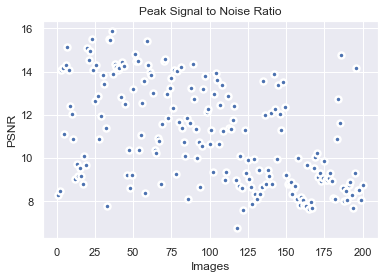

In [444]:
getScatterPlot(metric_df_cancer.PSNR, metric_df_cancer, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

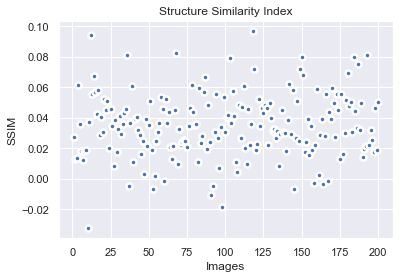

In [445]:
getScatterPlot(metric_df_cancer.SSIM, metric_df_cancer, title='Structure Similarity Index', file_name='ssim_scatter')

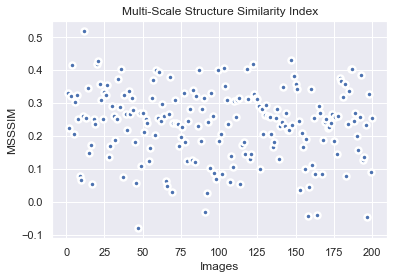

In [446]:
getScatterPlot(metric_df_cancer.MSSSIM, metric_df_cancer, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

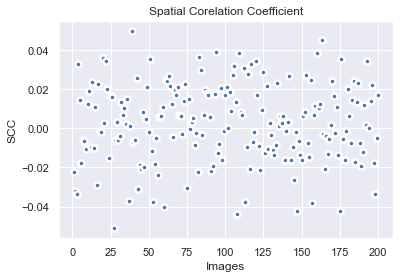

In [447]:
getScatterPlot(metric_df_cancer.SCC, metric_df_cancer, title='Spatial Corelation Coefficient', file_name='scc_scatter')

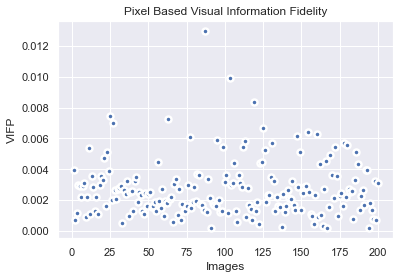

In [448]:
getScatterPlot(metric_df_cancer.VIFP, metric_df_cancer, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

### Regression Plot for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

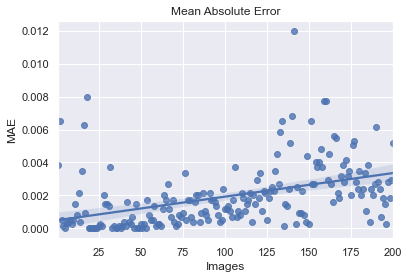

In [449]:
RegPlot(metric_df_cancer.MAE, metric_df_cancer, 'Mean Absolute Error', 'mae_scatter')

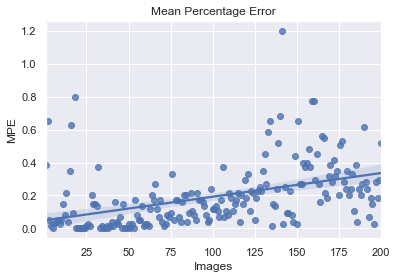

In [450]:
RegPlot(metric_df_cancer.MPE, metric_df_cancer, title='Mean Percentage Error', file_name='mpe_scatter')

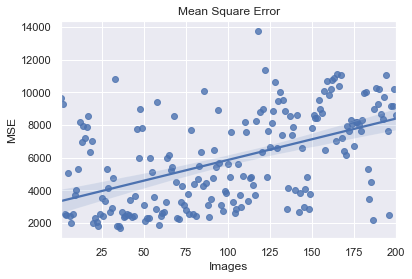

In [451]:
RegPlot(metric_df_cancer.MSE, metric_df_cancer, title='Mean Square Error', file_name='mse_scatter')

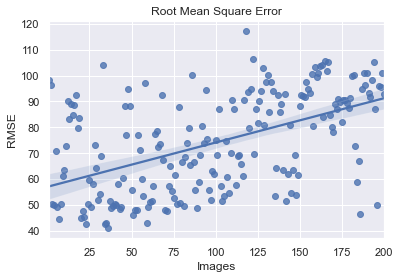

In [452]:
RegPlot(metric_df_cancer.RMSE, metric_df_cancer, title='Root Mean Square Error', file_name='rmse_scatter')

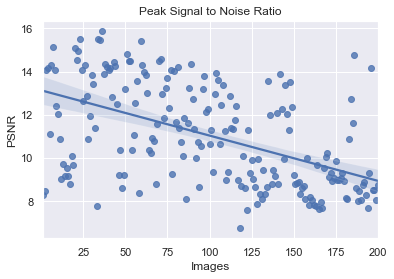

In [453]:
RegPlot(metric_df_cancer.PSNR, metric_df_cancer, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

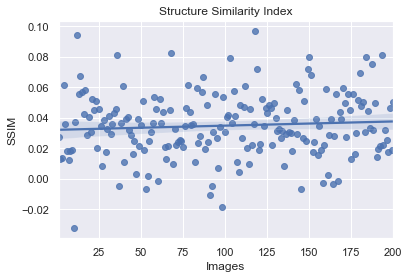

In [454]:
RegPlot(metric_df_cancer.SSIM, metric_df_cancer, title='Structure Similarity Index', file_name='ssim_scatter')

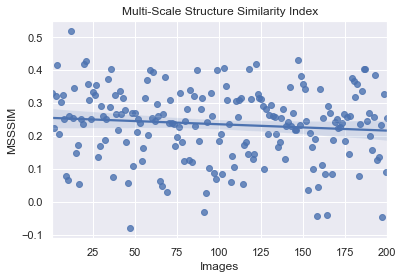

In [455]:
RegPlot(metric_df_cancer.MSSSIM, metric_df_cancer, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

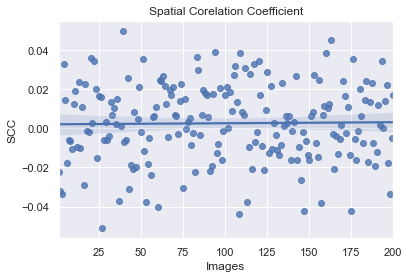

In [456]:
RegPlot(metric_df_cancer.SCC, metric_df_cancer, title='Spatial Corelation Coefficient', file_name='scc_scatter')

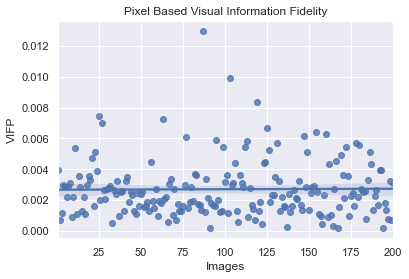

In [457]:
RegPlot(metric_df_cancer.VIFP, metric_df_cancer, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')